In [1]:
import os
import pandas as pd
import numpy as np
import scipy
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
#define directories
cwd = os.getcwd()
pathout = cwd + "/output"
if not os.path.exists(pathout):
    os.mkdir(pathout)

In [3]:
#load data
dfRNAseq = pd.read_csv('tcga.brca.rsem.csv', low_memory=False)

RNAsampletype = dfRNAseq['sample_type']
dfRNAseq.drop(['sample_type'], axis=1, inplace=True)

Typically it is necessary to log transform normalized counts before clustering.

In [4]:
#log2 transformation of RSEM normalized counts
dfnormRNAseq = pd.DataFrame()
epsilon = 0.000001

for index, row in dfRNAseq.iterrows():
    logarray = []
    for value in row:
        value = value + epsilon
        logvalue = np.log2(value)
        logarray = np.append(logarray, logvalue)
    tempseries = pd.Series(logarray, name = index)
    dfnormRNAseq = dfnormRNAseq.append(tempseries)

#format and save log2 transformed data
header = list(dfRNAseq.head(0))
dfnormRNAseq.columns = header
dfnormRNAseq2 = dfnormRNAseq
dfnormRNAseq2 = dfnormRNAseq2.assign(sample_type=lambda x: list(RNAsampletype))

filename = pathout + '/log2data.txt'
dfnormRNAseq2.to_csv(filename, sep='\t', index=True)

['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT', 'A4GNT', 'AAA1', 'AAAS', 'AACSL', 'AACS', 'AADACL2', 'AADACL3', 'AADACL4', 'AADAC', 'AADAT', 'AAGAB', 'AAK1', 'AAMP', 'AANAT', 'AARS2', 'AARSD1', 'AARS', 'AASDHPPT', 'AASDH', 'AASS', 'AATF', 'AATK', 'ABAT', 'ABCA10', 'ABCA11P', 'ABCA12', 'ABCA13', 'ABCA17P', 'ABCA1', 'ABCA2', 'ABCA3', 'ABCA4', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA8', 'ABCA9', 'ABCB10', 'ABCB11', 'ABCB1', 'ABCB4', 'ABCB5', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC10', 'ABCC11', 'ABCC12', 'ABCC13', 'ABCC1', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC6P1', 'ABCC6P2', 'ABCC6', 'ABCC8', 'ABCC9', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABCG1', 'ABCG2', 'ABCG4', 'ABCG5', 'ABCG8', 'ABHD10', 'ABHD11', 'ABHD12B', 'ABHD12', 'ABHD13', 'ABHD14A', 'ABHD14B', 'ABHD15', 'ABHD1', 'ABHD2', 'ABHD3', 'ABHD4', 'ABHD5', 'ABHD6', 'ABHD8', 'ABI1', 'ABI2', 'ABI3BP', 'ABI3', 'ABL1', 'ABL2', 'ABLIM1', 'ABLIM2', 'ABLIM3', 'ABO', 'ABP1', 'ABRA', 'ABR', 'ABT1', '

In [5]:
#perform PCA on entire RNA expression dataset
pca = PCA(n_components=2)
components = pca.fit_transform(dfnormRNAseq)

In [6]:
#separate PCA values by sample_type
PCAtypedict = {}
sampletypeset = set(RNAsampletype)

for item in RNAsampletype:
    PCAtypedict[item] = []
count = 0
for item in RNAsampletype:
    PCAtypedict[item].append(components[count])
    count = count + 1

primtumorPCA = PCAtypedict['Primary Tumor']
mettumorPCA = PCAtypedict['Metastasis']
normPCA = PCAtypedict['Adjacent Normal']

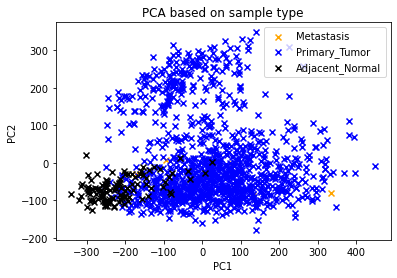

In [7]:
#visualize PCA results
for i in mettumorPCA:
    m = plt.scatter(i[0], i[1], marker='x', color = 'orange')
for i in primtumorPCA:
    pt = plt.scatter(i[0], i[1], marker='x', color = 'blue')
for i in normPCA:
    an = plt.scatter(i[0], i[1], marker='x', color = 'black')
plt.title('PCA based on sample type')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend((m, pt, an), ('Metastasis', 'Primary_Tumor', 'Adjacent_Normal'), loc="best")
plt.show()